In [1]:
#https://github.com/usagov/1.USA.gov-Data
#http://developer.usa.gov/1usagov
import json
import os

In [2]:
gov_file = 'usagov_bitly_data.txt'

In [3]:
#print(open(path).readline())
print(os.getcwd())
print(gov_file)

D:\_Job\BigData\IPython\study
usagov_bitly_data.txt


In [4]:
records = [json.loads(line) for line in open(gov_file)]
#print(records[0])


In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [8]:
time_zones[:5]

['America/Chicago',
 'America/Chicago',
 'America/New_York',
 'America/Los_Angeles',
 'America/Phoenix']

In [7]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] +=1
        else:
            counts[x] = 1
        #print(counts)
        #print("-------------")
    return counts

In [8]:
time_zone_count = get_counts(time_zones)

In [9]:
time_zone_count

{'America/Chicago': 30,
 'America/Denver': 1,
 'America/Indianapolis': 1,
 'America/Los_Angeles': 26,
 'America/Montreal': 2,
 'America/New_York': 49,
 'America/Phoenix': 3,
 'America/Port_of_Spain': 1,
 'America/Rainy_River': 1,
 'America/Sao_Paulo': 1,
 'Asia/Chongqing': 1,
 'Asia/Hong_Kong': 1,
 'Asia/Jerusalem': 2,
 'Europe/Berlin': 2,
 'Europe/Paris': 1}

In [10]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] +=1
    return counts

In [11]:
time_zone_count1 = get_counts2(time_zones)

In [12]:
time_zone_count1

defaultdict(int,
            {'America/Chicago': 30,
             'America/Denver': 1,
             'America/Indianapolis': 1,
             'America/Los_Angeles': 26,
             'America/Montreal': 2,
             'America/New_York': 49,
             'America/Phoenix': 3,
             'America/Port_of_Spain': 1,
             'America/Rainy_River': 1,
             'America/Sao_Paulo': 1,
             'Asia/Chongqing': 1,
             'Asia/Hong_Kong': 1,
             'Asia/Jerusalem': 2,
             'Europe/Berlin': 2,
             'Europe/Paris': 1})

In [13]:
time_zone_count1['America/Chicago']

30

In [14]:
def top_counts(count_dict, n = 5):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [15]:
top_counts(time_zone_count1)

[(2, 'Europe/Berlin'),
 (3, 'America/Phoenix'),
 (26, 'America/Los_Angeles'),
 (30, 'America/Chicago'),
 (49, 'America/New_York')]

In [16]:
#import collections as col
from collections import Counter
counts = Counter(time_zones)
counts.most_common(5)

[('America/New_York', 49),
 ('America/Chicago', 30),
 ('America/Los_Angeles', 26),
 ('America/Phoenix', 3),
 ('Europe/Berlin', 2)]

In [17]:
from pandas import DataFrame, Series
import pandas as pd; import numpy as np
frame = DataFrame(records)
#frame[:5]

frame['tz'][:5]

In [18]:
frame['_id'][:2]

0    98aa456e-5739-997a-57f4-66ae95abfff9
1    af749520-f407-8595-a853-366df9c0becc
Name: _id, dtype: object

In [19]:
tz_counts = frame['tz'].value_counts()

In [20]:
tz_counts[:5]

America/New_York       49
America/Chicago        30
America/Los_Angeles    26
America/Phoenix         3
Asia/Jerusalem          2
dtype: int64

In [21]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()

In [22]:
tz_counts[:5]

America/New_York       49
America/Chicago        30
America/Los_Angeles    26
Missing                 8
America/Phoenix         3
dtype: int64

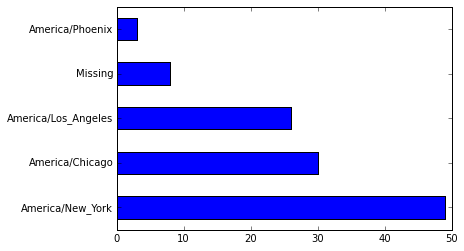

In [24]:
%matplotlib inline  
tz_counts[:5].plot(kind='barh',rot=0)

In [25]:
frame['a'][1]

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.71 Safari/537.36'

In [37]:
frame['a'][10]

'Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12B410 Safari/600.1.4'

In [55]:
results = Series([x.split()[0]] for x in frame.a.dropna())

In [56]:
results[:5]

0    [Mozilla/5.0]
1    [Mozilla/5.0]
2    [Mozilla/5.0]
3    [Mozilla/5.0]
4    [Mozilla/5.0]
dtype: object

In [54]:
results.value_counts()

TypeError: unhashable type: 'list'

In [77]:
cframe = frame[frame.a.notnull()]

In [70]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [74]:
operating_system[:5]

array(['Not Windows', 'Not Windows', 'Not Windows', 'Not Windows',
       'Not Windows'], 
      dtype='<U11')

In [75]:
by_tz_os = cframe.groupby(['tz',operating_system])

In [84]:
# by_tz_os.size().unstack().fillna(0)
agg_counts = by_tz_os.size().unstack().fillna(0)

In [86]:
agg_counts

,Not Windows,Windows
tz,,
America/Chicago,18,12
America/Denver,1,0
America/Indianapolis,1,0
America/Los_Angeles,18,8
America/Montreal,0,2
America/New_York,30,19
America/Phoenix,1,2
America/Port_of_Spain,1,0
America/Rainy_River,0,1


In [96]:
indexer = agg_counts.sum(1).argsort()

In [97]:
indexer

tz
America/Chicago           1
America/Denver            2
America/Indianapolis      7
America/Los_Angeles       8
America/Montreal          9
America/New_York         10
America/Phoenix          11
America/Port_of_Spain    14
America/Rainy_River       4
America/Sao_Paulo        12
Asia/Chongqing           13
Asia/Hong_Kong            6
Asia/Jerusalem            3
Europe/Berlin             0
Europe/Paris              5
dtype: int64

In [112]:
count_subset = agg_counts.take(indexer)[-10:]

In [113]:
count_subset

,Not Windows,Windows
tz,,
Asia/Chongqing,0,1
Asia/Hong_Kong,0,1
Europe/Paris,1,0
America/Montreal,0,2
Asia/Jerusalem,2,0
Europe/Berlin,2,0
America/Phoenix,1,2
America/Los_Angeles,18,8
America/Chicago,18,12


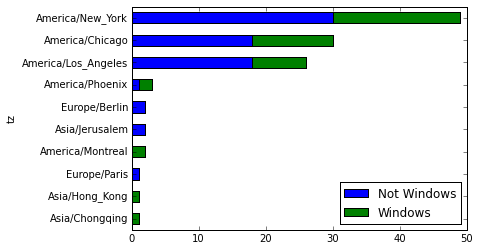

In [114]:
count_subset.plot(kind = 'barh', stacked = True)

In [115]:
normed_subset = count_subset.div(count_subset.sum(1), axis = 0)

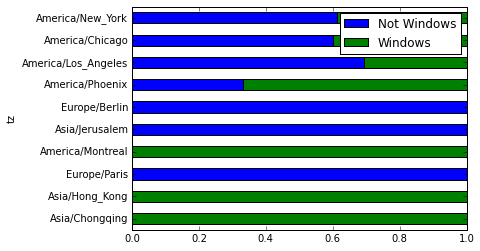

In [116]:
normed_subset.plot(kind = 'barh', stacked = True)